# Global Burden of Diseases Mortality Results Analysis

## 📊 Overview
The Global Burden of Disease Study 2010 estimated the burden of diseases, injuries, and risk factors across the globe and within 21 world regions for the years 1990 and 2010. A key dataset from this study, provided by the Institute for Health Metrics and Evaluation [(IHME)](https://ghdx.healthdata.org/record/ihme-data/gbd-2010-mortality-results-1970-2010), includes the number of deaths and mortality rates by age group and sex for 187 countries, 21 regions, and globally—spanning the years 1970, 1980, 1990, 2000, and 2010.

This project analyzes global and regional mortality trends using the GBD 2010 data, with a focus on identifying how mortality rates vary by age group, region, and over time. Through data exploration and visualization in Python, the analysis aims to reveal key insights into mortality patterns and evolving public health priorities around the world.

## 🎯 Objectives  
- Analyze mortality rates by age group, sex, and region over time (1970–2010) to identify patterns and disparities.
- Visualize trends in global and regional death rates to communicate key findings effectively.
- Explore changes between 1990 and 2010 to assess progress and remaining challenges in global health.

## Basic Set Ups

In [3]:
# pip install -U kaleido
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Import Data
df = pd.read_csv('IHME_GBD_2010_MORTALITY_AGE_SPECIFIC_BY_COUNTRY_1970_2010.csv')

## Data Cleaning

In [5]:
# Checking for Missing Values
missing_values = df.isnull().sum()
print('\nMissing Values in Each Column:\n')
print(missing_values[missing_values > 0])


Missing Values in Each Column:

Series([], dtype: int64)


There are no missing values in any of the columns in the dataset.

## Data Understanding

In [5]:
# Basic Data Inspection
print('\nDataset Information:\n')
df.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58905 entries, 0 to 58904
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country Code            58905 non-null  object
 1   Country Name            58905 non-null  object
 2   Year                    58905 non-null  int64 
 3   Age Group               58905 non-null  object
 4   Sex                     58905 non-null  object
 5   Number of Deaths        58905 non-null  object
 6   Death Rate Per 100,000  58905 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


In [6]:
# Basic Statistics
print('\nBasic Statistical Summary:\n')
print(df.describe())


Basic Statistical Summary:

               Year
count  58905.000000
mean    1990.000000
std       14.142256
min     1970.000000
25%     1980.000000
50%     1990.000000
75%     2000.000000
max     2010.000000


In [7]:
print('\nFirst 5 Rows of the Dataset:\n')
print(df.head())


First 5 Rows of the Dataset:

  Country Code Country Name  Year  Age Group     Sex Number of Deaths  \
0          AFG  Afghanistan  1970   0-6 days    Male           19,241   
1          AFG  Afghanistan  1970   0-6 days  Female           12,600   
2          AFG  Afghanistan  1970   0-6 days    Both           31,840   
3          AFG  Afghanistan  1970  7-27 days    Male           15,939   
4          AFG  Afghanistan  1970  7-27 days  Female           11,287   

  Death Rate Per 100,000  
0             318,292.90  
1             219,544.20  
2             270,200.70  
3              92,701.00  
4              68,594.50  


In [6]:
# Remove Rows Where Sex is "Both"
df = df[df['Sex'] != 'Both']

In [42]:
# Inspect Column Header
print("\nColumn Names in Dataset:\n", df.columns)


Column Names in Dataset:
 Index(['Country Code', 'Country Name', 'Year', 'Age Group', 'Sex',
       'Number of Deaths', 'Death Rate Per 100,000'],
      dtype='object')


## Exploratory Data Analysis

### Total Death Rate by Country

In [8]:
# Clean 'Death Rate' Column (Change 'Total Death' to Numeric)
df['Death Rate Per 100,000'] = pd.to_numeric(df['Death Rate Per 100,000'].astype(str).str.replace(',', ''), errors = 'coerce')

# Group by Country and Sum
total_death_rate_by_country = df.groupby('Country Name')['Death Rate Per 100,000'].sum().sort_values(ascending = False)

In [83]:
# Total Death Rate by Country Per 100,000
print("\nTotal Death Rate by Country Per 100,000:\n")
print(total_death_rate_by_country)


Total Death Rate by Country Per 100,000:

Country Name
Mali             3495088.7
Sierra Leone     3458498.7
Guinea           3081990.8
Guinea-Bissau    3073673.8
Ethiopia         3031817.7
                   ...    
France            490054.1
Sweden            460886.3
Iceland           446462.3
Japan             430564.1
Andorra           416332.4
Name: Death Rate Per 100,000, Length: 187, dtype: float64


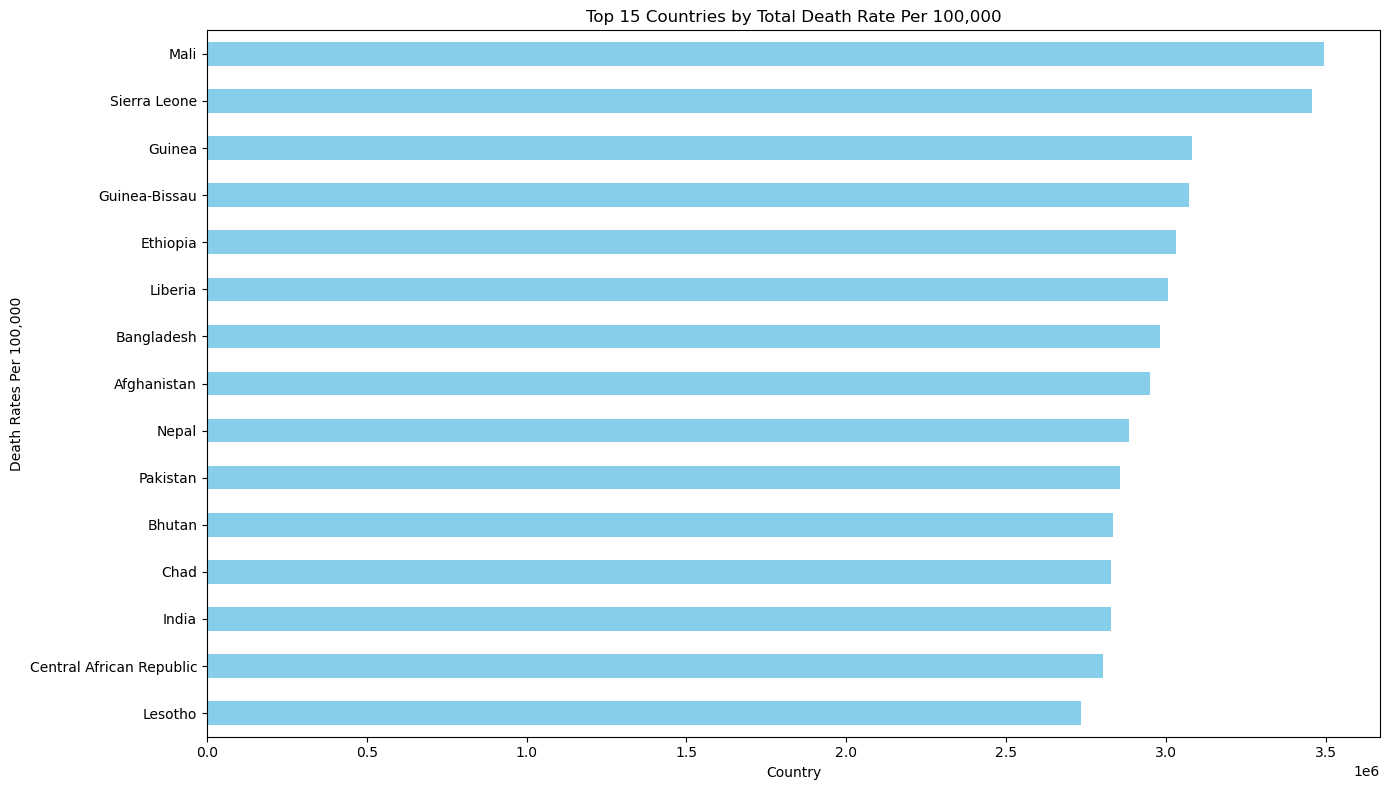

In [85]:
# Bar Plot of Death Rates by Country (Top 15)
plt.figure(figsize = (14, 8))
total_death_rate_by_country.head(15).iloc[::-1].plot(kind = 'barh', color = 'skyblue')
plt.title('Top 15 Countries by Total Death Rate Per 100,000')
plt.ylabel('Death Rates Per 100,000')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

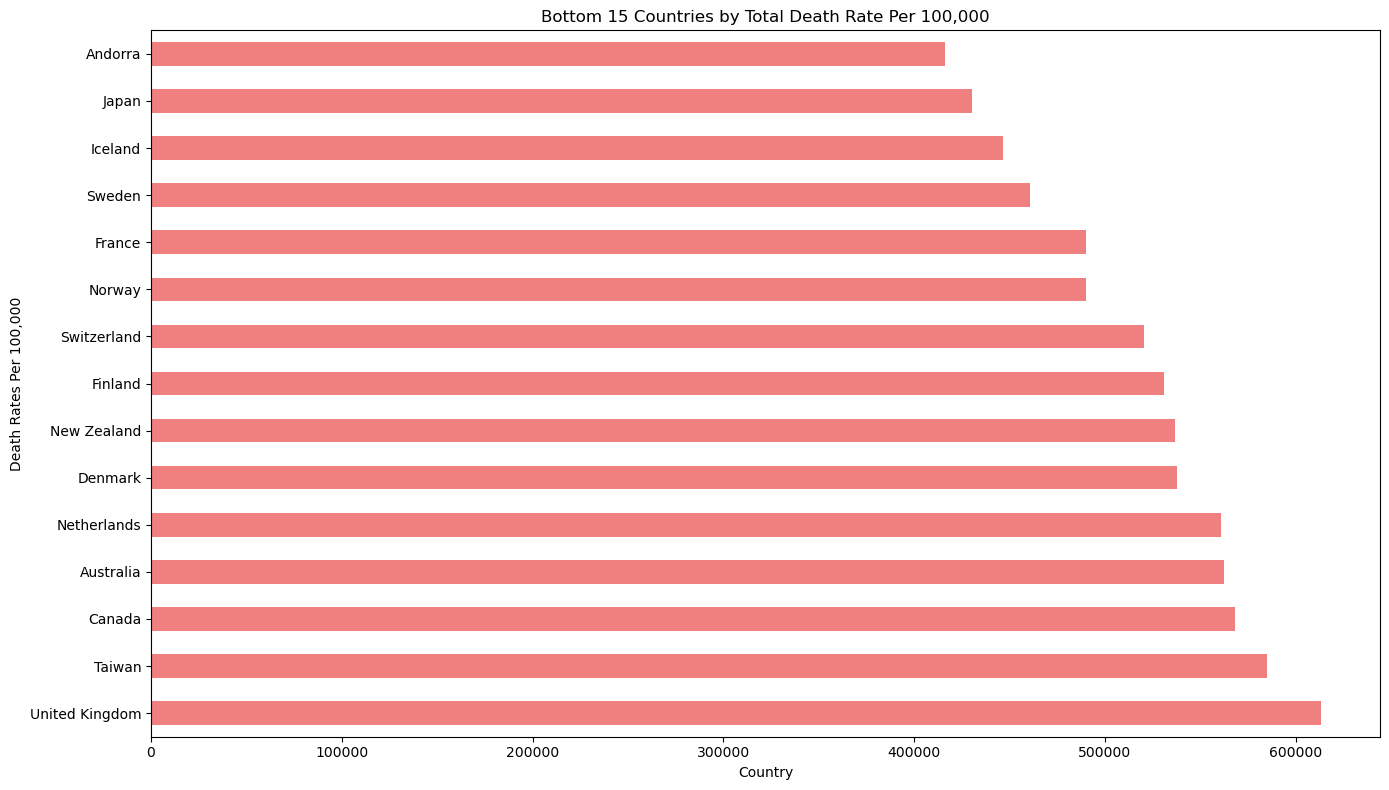

In [84]:
# Bar Plot of Death Rates by Country (Bottom 15)
plt.figure(figsize = (14, 8))
total_death_rate_by_country.tail(15).plot(kind = 'barh', color = 'lightcoral')
plt.title('Bottom 15 Countries by Total Death Rate Per 100,000')
plt.ylabel('Death Rates Per 100,000')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

In [21]:
# Choropleth Map: Total Death Rate by Country
geojson = px.data.election_geojson()

fig = px.choropleth(
    total_death_rate_by_country.reset_index(),
    locations = 'Country Name',
    locationmode = 'country names',
    color = 'Death Rate Per 100,000',
    hover_name = 'Country Name',
    color_continuous_scale = 'Viridis',
    title = '🌍 Global Death Rate by Country (Per 100,000)'
)

fig.update_layout(geo = dict(showframe = False, showcoastlines = False))

In [22]:
# Save Choropleth Map to HTML File
fig.write_html("Global-Death-Rate-by-Country.html")
print("Interactive Choropleth Map saved as 'Global-Death-Rate-by-Country.html'")

# Save Choropleth Map as Static Image for GitHub Previews
fig.write_image("Global-Death-Rate-by-Country-Static.png")
print("Static Choropleth Map saved as 'Global-Death-Rate-by-Country-Static.png'")

Interactive Choropleth Map saved as 'Global-Death-Rate-by-Country.html'
Static Choropleth Map saved as 'Global-Death-Rate-by-Country-Static.png'


![Choropleth Map](Global-Death-Rate-by-Country-Static.png)
👉 [Click Here to View the Interactive Version](Global-Death-Rate-by-Country.html)

This choropleth map provides a geographical visualization of mortality burdens globally.

In [23]:
# Create Animated Choropleth Map
animated_map_df = df.groupby(['Country Name', 'Year'])['Death Rate Per 100,000'].mean().reset_index()

fig = px.choropleth(
    animated_map_df,
    locations = 'Country Name',
    locationmode = 'country names',
    color = 'Death Rate Per 100,000',
    hover_name = 'Country Name',
    animation_frame = 'Year',
    color_continuous_scale = 'Plasma',
    title = '🌍 Global Death Rate by Year (Per 100,000)'
)

fig.update_layout(
    geo = dict(
        showcoastlines = False,
        projection_type = 'natural earth'
    ),
    width = 1000,
    height = 600,
    margin = dict(l = 0, r = 0, t = 40, b = 0)
)

In [24]:
# Save Choropleth Map to HTML File
fig.write_html("Global-Death-Rate-by-Year.html")
print("Interactive Choropleth Map saved as 'Global-Death-Rate-by-Year.html'")

# Save Choropleth Map as Static Image for GitHub Previews
fig.write_image("Global-Death-Rate-by-Year-Static.png")
print("Static Choropleth Map saved as 'Global-Death-Rate-by-Year-Static.png'")

Interactive Choropleth Map saved as 'Global-Death-Rate-by-Year.html'
Static Choropleth Map saved as 'Global-Death-Rate-by-Year-Static.png'


![Choropleth Map](Global-Death-Rate-by-Year-Static.png)
👉 [Click Here to View the Interactive Version](Global-Death-Rate-by-Year.html)

This animation visualizes how death rates have changed globally from 1970 to 2010.

### Total Death Rate by Age Group

In [48]:
# Reorder Age Group
age_order = [
    '0-6 days', '7-27 days', '28-364 days', '1-4 years', '5-9 years', '10-14 years', '15-19 years',
    '20-24 years', '25-29 years', '30-34 years', '35-39 years', '40-44 years', '45-49 years',
    '50-54 years', '55-59 years', '60-64 years', '65-69 years', '70-74 years', '75-79 years',
    '80+ years', 'All ages'
]

In [49]:
# Total Death Rate by Age Group Per 100,000
total_death_rate_by_age_group = df.groupby('Age Group')['Death Rate Per 100,000'].mean()
total_death_rate_by_age_group = total_death_rate_by_age_group.reindex(age_order)

print("\nAverage Death Rate Per 100,000 by Age Group:\n")
print(total_death_rate_by_age_group)


Average Death Rate Per 100,000 by Age Group:

Age Group
0-6 days       93216.088930
7-27 days      13447.541765
28-364 days     2904.520160
1-4 years        790.751337
5-9 years        104.090856
10-14 years       80.206631
15-19 years      140.012406
20-24 years      221.301016
25-29 years      278.196791
30-34 years      333.553797
35-39 years      430.330214
40-44 years      527.715775
45-49 years      708.827273
50-54 years      997.572567
55-59 years     1409.686738
60-64 years     2160.349840
65-69 years     3224.041070
70-74 years     4931.288289
75-79 years     7446.303422
80+ years      14086.996738
All ages         960.083155
Name: Death Rate Per 100,000, dtype: float64


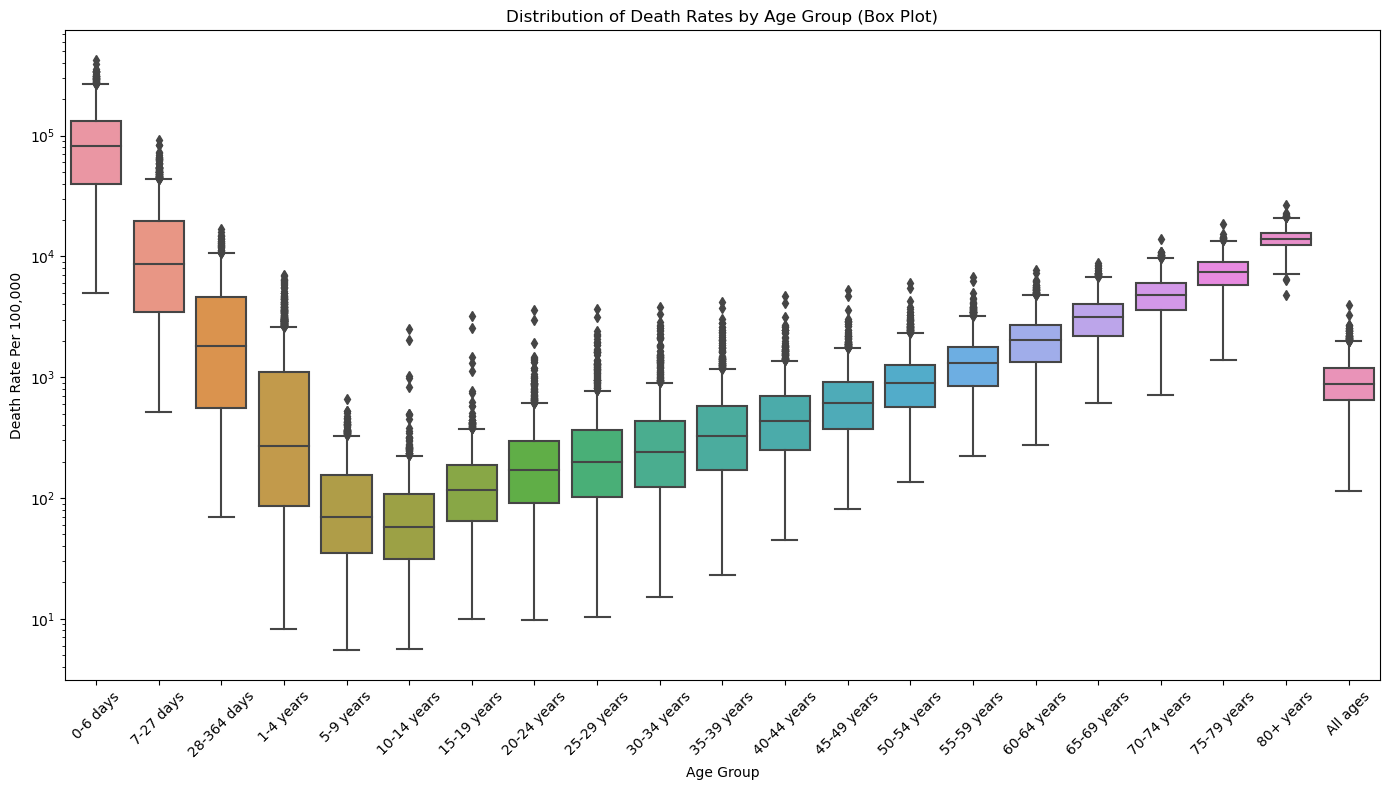

In [50]:
# Box Plot of Total Death Rates by Age Group (Logarithmic Scale)
plt.figure(figsize = (14, 8))
sns.boxplot(data = df, x = 'Age Group', y = 'Death Rate Per 100,000', order = age_order)
plt.yscale('log') # Applying Log Scale
plt.title('Distribution of Death Rates by Age Group (Box Plot)')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

To make the box plot more visually informative and reduce the skew caused by the extremely high value in the '0–6 days' age group, I applied a logarithmic scale. This adjustment minimizes the visual dominance of outliers while preserving relative differences.

### Total Death Rate by Sex

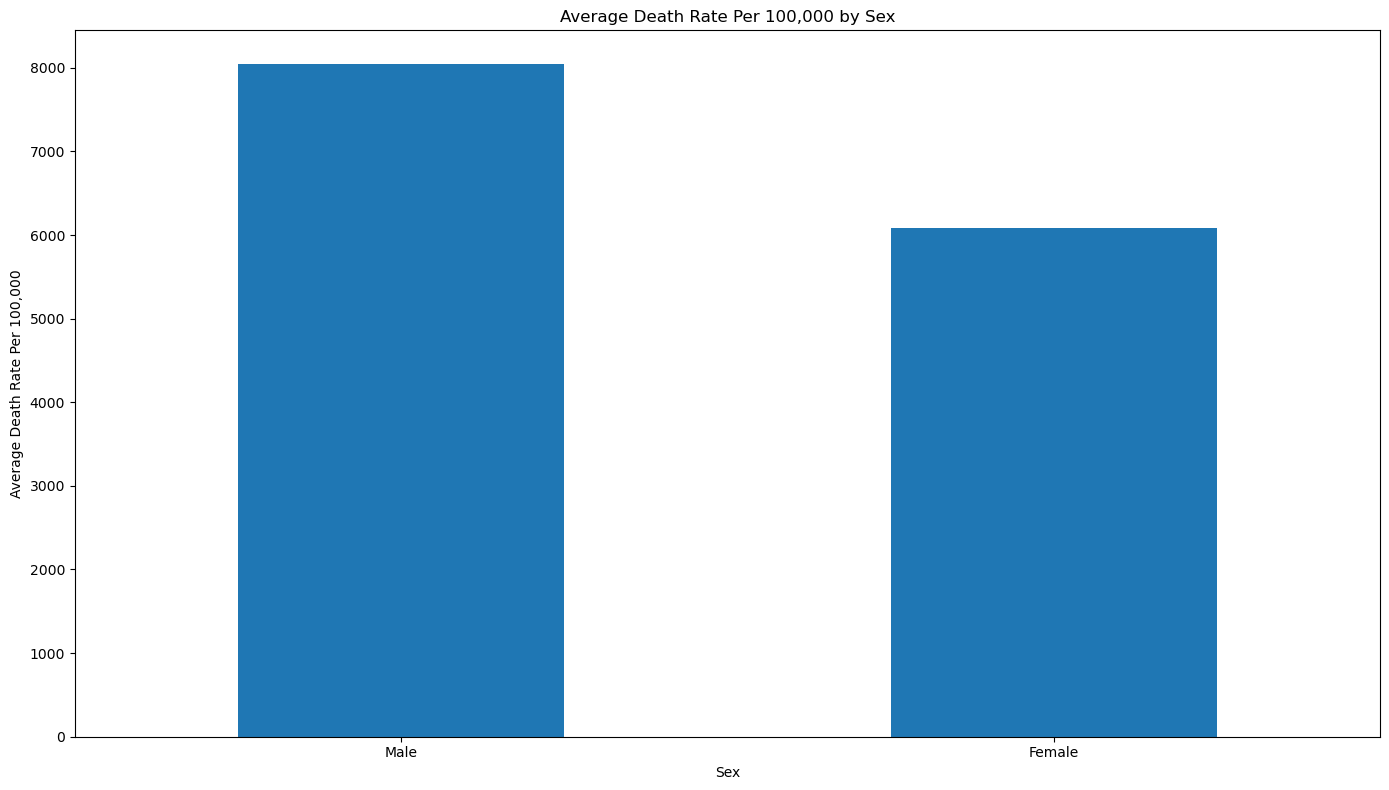

In [51]:
# Bar Plot for Total Death Rate by Sex
plt.figure(figsize = (14, 8))
df.groupby('Sex')['Death Rate Per 100,000'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Average Death Rate Per 100,000 by Sex')
plt.ylabel('Average Death Rate Per 100,000')
plt.xlabel('Sex')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

Males show consistently higher death rates compared to females.

### Total Death Rate by Years

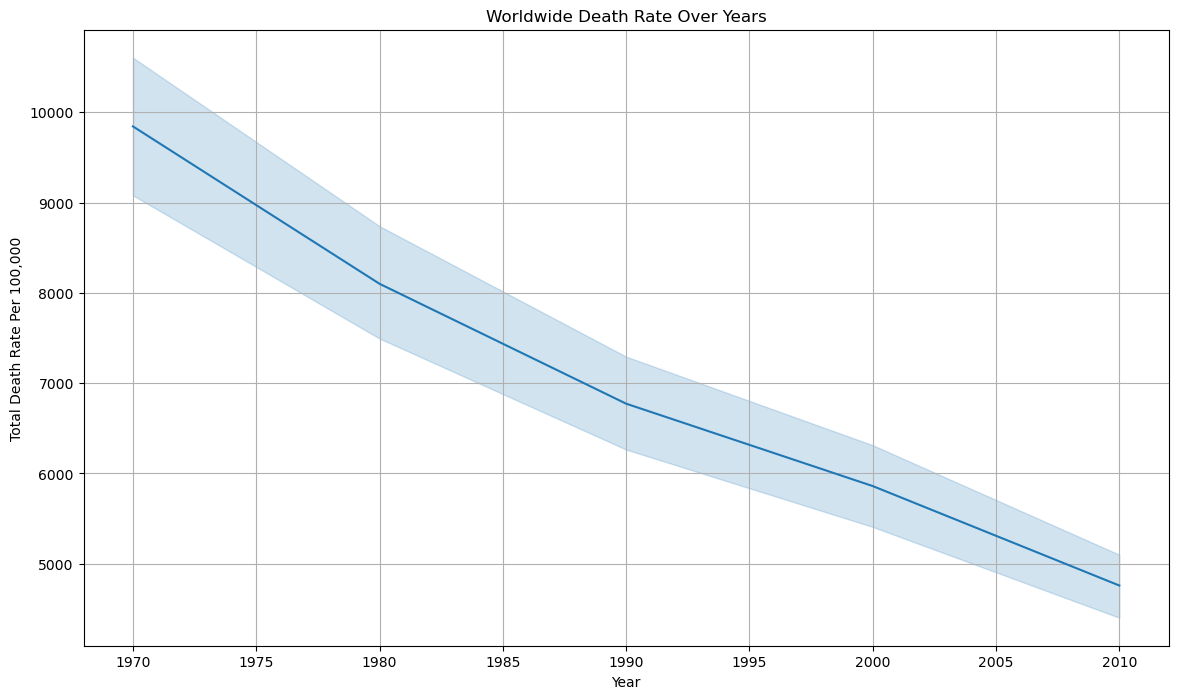

In [52]:
# Fertility Rate Worldwide
plt.figure(figsize = (14, 8))
sns.lineplot(x = 'Year', y = 'Death Rate Per 100,000', data = df)
plt.xlabel("Year")
plt.ylabel("Total Death Rate Per 100,000")
plt.title("Worldwide Death Rate Over Years")
plt.legend([], [], frameon = False)
plt.grid(True)
plt.show()

This shows a general decline in global death rates across decades.

### USA vs. Global Death Rate Over the Years

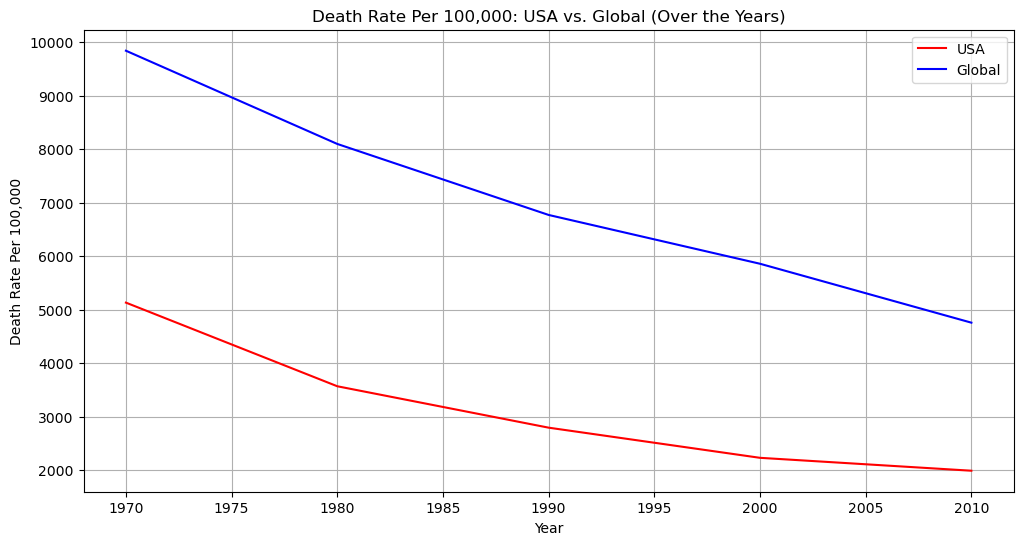

In [53]:
# Filter USA Data
usa_df = df[df['Country Name'] == 'United States']

# Group by Year for USA and Global
usa_yearly = usa_df.groupby('Year')['Death Rate Per 100,000'].mean()
global_yearly = df.groupby('Year')['Death Rate Per 100,000'].mean()

# Combine into a DataFrame
comparison_df = pd.DataFrame({
    'USA': usa_yearly,
    'Global': global_yearly
})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(comparison_df.index, comparison_df['USA'], label = 'USA', color = 'red')
plt.plot(comparison_df.index, comparison_df['Global'], label = 'Global', color = 'blue')
plt.title('Death Rate Per 100,000: USA vs. Global (Over the Years)')
plt.xlabel('Year')
plt.ylabel('Death Rate Per 100,000')
plt.legend()
plt.grid(True)
plt.show()

## Deep-Dive Data Analysis

### Age Group vs. Years

A logarithmic color scale was applied to improve the trend analysis and the heatmap of death rates by age group and year, and to prevent the '0–6 days' row from visually dominating due to its extremely high values.

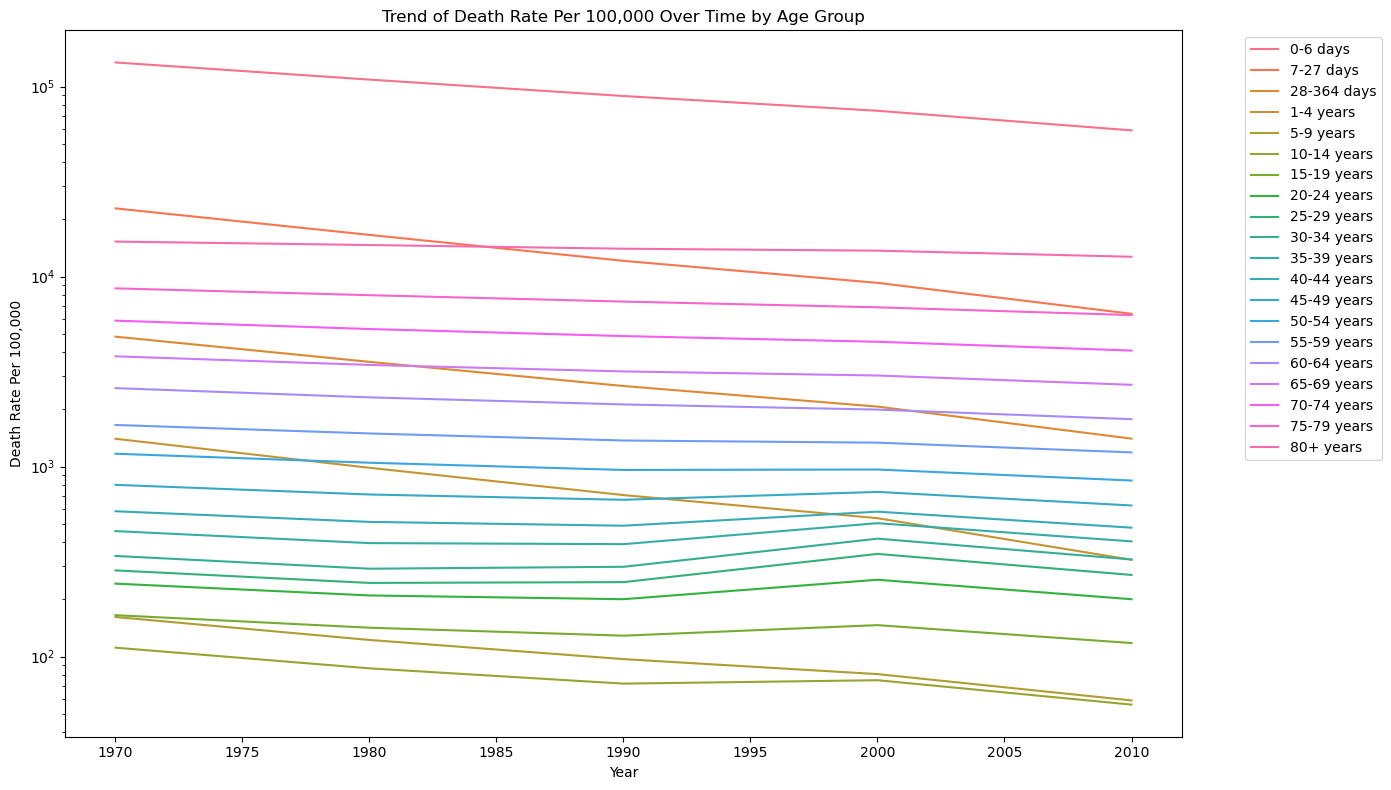

In [54]:
# Trend Analysis Over Time by Age Group (Logarithmic Scale)
plt.figure(figsize = (14, 8))
sns.lineplot(data = df[df['Age Group'] != 'All ages'], x = 'Year', y = 'Death Rate Per 100,000',
             hue = 'Age Group', estimator = 'mean', ci = None)
plt.yscale('log') # Applying Log Scale
plt.title('Trend of Death Rate Per 100,000 Over Time by Age Group')
plt.ylabel('Death Rate Per 100,000')
plt.xlabel('Year')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

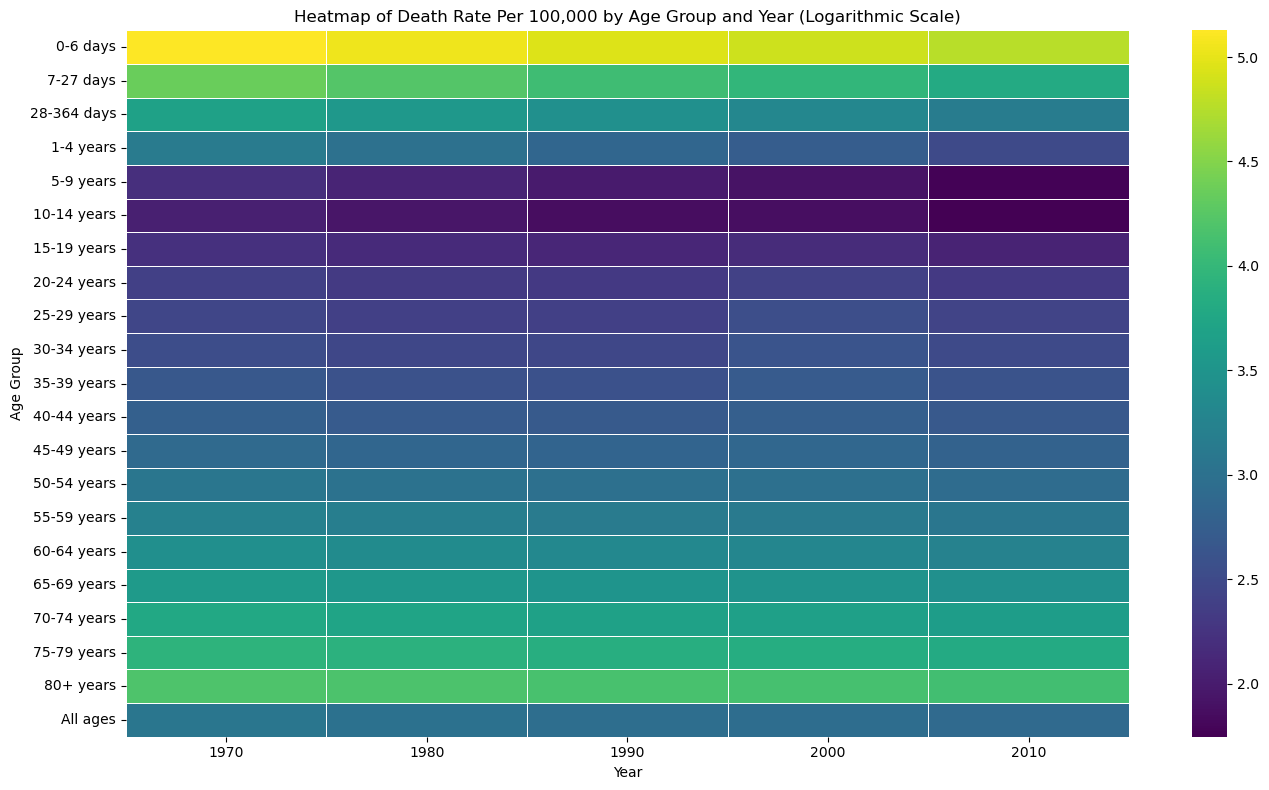

In [55]:
# Apply log10 to Avoid log(0)
pivot_table = df.pivot_table(values = 'Death Rate Per 100,000', index = 'Age Group',
                             columns = 'Year', aggfunc = 'mean').reindex(age_order)
log_transformed = np.log10(pivot_table + 1e-6)

# Heatmap for Age Group vs. Year
plt.figure(figsize = (14, 8))
sns.heatmap(log_transformed, cmap = 'viridis', annot = False, linewidths = .5)
plt.title('Heatmap of Death Rate Per 100,000 by Age Group and Year (Logarithmic Scale)')
plt.xlabel('Year')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

With the log-scaled version, the differences between age groups are now more apparent. I can still observe that early life stages (0–6 days and 7–27 days) historically experienced high mortality, but there's a noticeable decline over time. In contrast, older age groups (65+) show a slower yet steady increase, possibly due to aging populations or the rising prevalence of chronic diseases.

### Country vs. Years

In [56]:
# Pivot Table: Country vs. Years
country_trends = df.pivot_table(index = 'Country Name', columns = 'Year',
                                values = 'Death Rate Per 100,000', aggfunc = 'mean').fillna(0)

# Standardize
scaler = StandardScaler()
country_scaled = scaler.fit_transform(country_trends)

# KMeans Clustering
kmeans = KMeans(n_clusters = 4, random_state = 0)
clusters = kmeans.fit_predict(country_scaled)
country_trends['Cluster'] = clusters

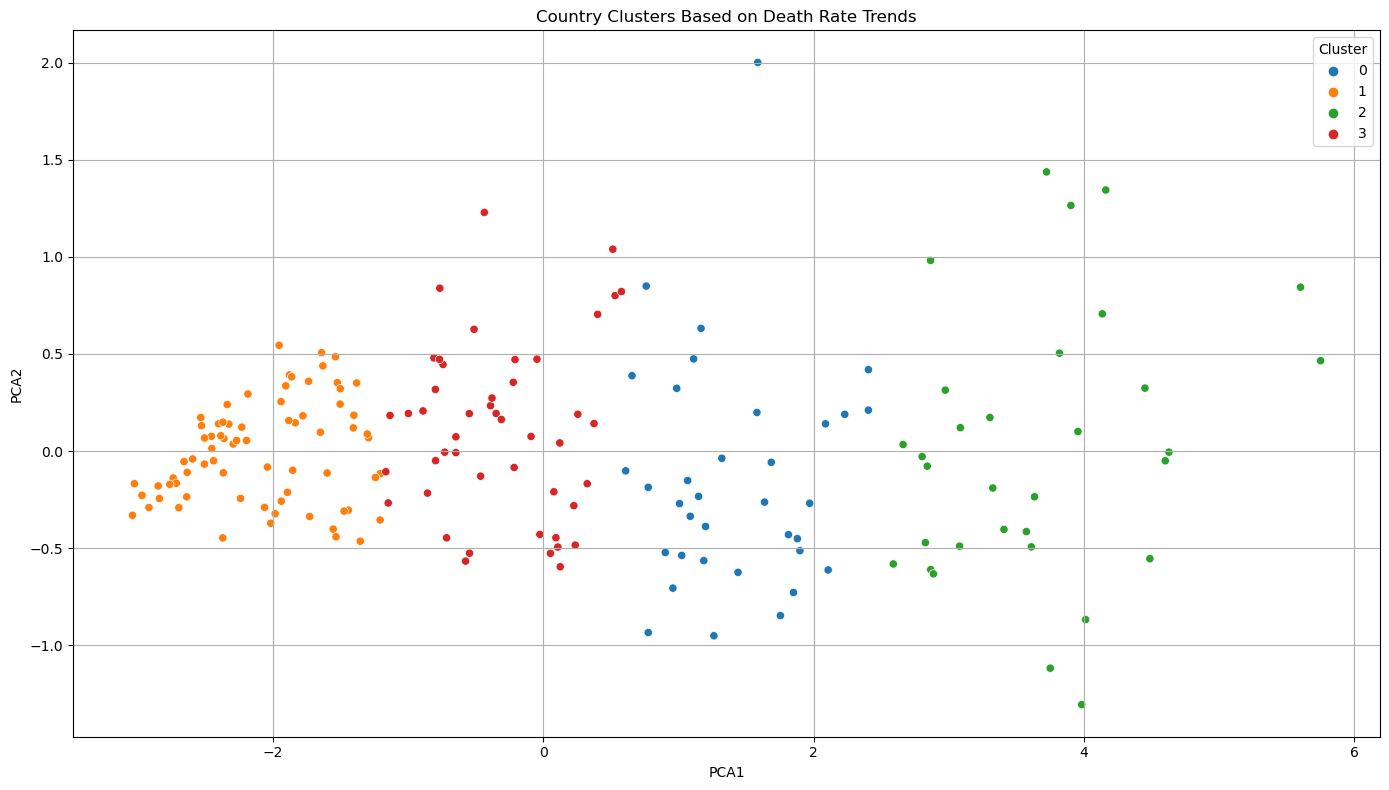

In [58]:
# Plot Clusters (e.g., 2D via PCA)
pca = PCA(n_components = 2)
reduced = pca.fit_transform(country_scaled)
country_trends['PCA1'] = reduced[:, 0]
country_trends['PCA2'] = reduced[:, 1]

plt.figure(figsize = (14, 8))
sns.scatterplot(data = country_trends, x = 'PCA1', y = 'PCA2', hue = 'Cluster', palette = 'tab10')
plt.title('Country Clusters Based on Death Rate Trends')
plt.tight_layout()
plt.grid(True)
plt.show()

The clusters appear to be widely spread or poorly grouped. This may be due to significant differences between countries across various factors, resulting in distinct death profiles. Additionally, if one or two age groups (e.g., '0–6 days') dominate the dataset numerically, they can skew the clustering results.

## Predictive Modeling

In [92]:
# Random Forest: Predict Future Death Rates
model_df = df[['Year', 'Sex', 'Age Group', 'Country Name', 'Death Rate Per 100,000']].copy()
model_df = pd.get_dummies(model_df, columns = ['Sex', 'Age Group', 'Country Name'])

X = model_df.drop('Death Rate Per 100,000', axis = 1)
y = model_df['Death Rate Per 100,000']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
# Model Performance
predictions = rf_model.predict(X_test)
print("\nModel Performance")
print("R^2 Score:", r2_score(y_test, predictions))
print("RMSE:", mean_squared_error(y_test, predictions, squared = False))


Model Performance
R^2 Score: 0.7630654940777085
RMSE: 12445.463583723302


The Random Forest model is well-suited for capturing complex, non-linear patterns in the data. Performance metrics suggest that the model fits reasonably well and has potential for forecasting applications.

An R² score of 0.76 indicates that approximately 76% of the variance in death rates is explained by the model. The RMSE (Root Mean Squared Error) of 12,445 deaths per 100,000 reflects the average magnitude of prediction error.

## Feature Importance Analysis

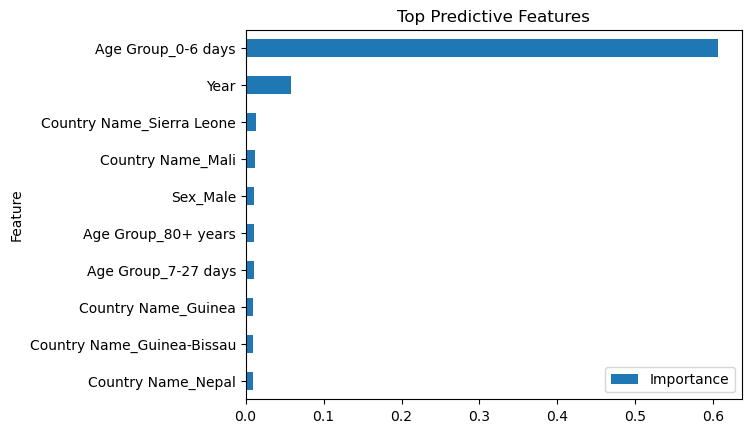

In [100]:
# To Understand Which Factors Most Affect Death Predictions
importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances}).sort_values(by='Importance', ascending = False)

importance_df.head(10).plot(kind='barh', x = 'Feature', y = 'Importance', title = 'Top Predictive Features')
plt.gca().invert_yaxis()
plt.show()

The Random Forest feature importance chart highlights which variables are most frequently used by the model's decision trees. It reveals the dominant influence of **age-related** features, particularly those associated with early life (0–6 days, 7–27 days) and old age (80+), confirming that mortality is highly age-dependent and especially sensitive at the extremes of life. The importance of the **"year"** variable suggests that major global events—such as epidemics, wars, or medical advancements—play a critical role in shaping mortality outcomes. Additionally, **certain countries** exhibit uniquely high or low death rates, underscoring the value of incorporating country-level data in the modeling process. Finally, the significance of the **"male"** feature aligns with established epidemiological patterns, reflecting consistently higher mortality rates among males across most age groups and health conditions.

## 🧠 Key Insights

- Extremely high infant mortality dominates visuals unless adjusted.
- Male mortality rates consistently exceed female rates.
- Death rates declined significantly post-1990, but elderly rates remain steady.
- Clustering reveals disparities but requires more regional features for precision.
- Predictive modeling shows potential to forecast future trends in global mortality.